# Final Project Submission

# Metadata

Final project for DS5100

7/15/22

Kate Meldrum

kmm4ap

Notebook URL:

Project repo url:

# Montecarlo Module:

In [2]:
import numpy as np
import pandas as pd
import random


# Shortcuts:

six_faces = [1, 2, 3, 4, 5, 6]


class die:
    
    '''
    A die has N sides, or “faces”, and W weights, and can be rolled to select a face
    '''
    
    def __init__(self,faces):
        
        '''
        purpose: create instance of class die
        param: <array> of faces on die
        return: None
        '''
        
        weights = [1.0 for x in faces] # Create default weights
        
        #die attributes
        self.faces = faces
        self.weights = weights
        self.__fwdf__ = pd.DataFrame(self.weights, index=self.faces)
        self.__fwdf__.columns = ['Weight']
        self.__fwdf__.index.name = 'Faces'
        
    def change_weight(self, face, weight):
        
        '''
        purpose: change weight given to a face of die in roll
        param1: <string, int, float> face to weight
        param2: <int or float> weight to be given to face 
        return: None
        '''
        
        # must be existing face and numeric weight
        if face in self.faces: 
            if type(weight)==float or type(weight)==int:
                i = self.faces.index(face)
                self.weights[i] = float(weight)
                self.__fwdf__ = pd.DataFrame(self.weights, index=self.faces)
                self.__fwdf__.columns = ['Weight']
                self.__fwdf__.index.name = 'Faces'
            else:
                print('Weight must be entered as float or int')
        else: 
            print('Face does not exist on this die')
            
    def roll_die(self, rolls=1):
        
        '''
        purpose: return a random face of die with condiseration to weights
        param: <int >number of rolls 
        return: <list> face values
        '''
        
        # random.choices pulls sample with replacement
        return random.choices(self.faces, weights=self.weights, k=rolls)
    
    def display(self):
        
        '''
        purpose: user can see faces and weights of die instance
        return: dataframe
        '''
        
        # allows users to access private face weight dataframe
        return self.__fwdf__


class game: 
    
    '''
    A game consists of rolling of one or more dice of the same list of faces one or more times
    '''
    
    # Default dice
    die1 = die(six_faces)
    die2 = die(six_faces)
    die3 = die(six_faces)
    die4 = die(six_faces)
    die5 = die(six_faces)
    die6 = die(six_faces)
    die_list = [die1,die2,die3,die4,die5,die6]
    
    __playdf__ = pd.DataFrame()# Empty data frame to be filled with game results and global amongst functions
    
    def __init__(self, die_list=die_list, __playdf__=__playdf__):
        
        '''
        purpose: create and isntance of a game
        param: <list of class die> , must have same number of faces
        return: None
        '''
        
        #attributes
        for die in die_list:
            self.die=die
        self.die_list=die_list
        self.__playdf__=__playdf__
        
    def play(self, n=100):
        
        '''
        purpose: roll each die in game a number of times and imput face values into global dataframe
        param: <int> number of rolls
        return: None
        '''
        
        #for each die, roll a certain amount of times and add to dictionary, create private dataframe when all dice have been rolled
        data = {}
        count=1
        for die in self.die_list:
            data["Die "+str(count)] = [die.roll_die()[0] for i in range(n)]
            count+=1
        self.__playdf__ = pd.DataFrame(data, index = range(1, n+1))
    
    def show_rolls(self, wide=True):
        
        '''
        purpose: display results of play function to user
        param: <bool> indicating wide or narrow, defaults to wide
        return: dataframe 
        '''
        
        # allow user to access private play dataframe
        if wide==True: 
            return self.__playdf__
        if wide == False:
            return self.__playdf__.stack()
        else:
            print('Expected argument: True or False')


class analyzer:
    '''
    takes the results of a single game and computes various descriptive statistical properties about it
    '''
    
    game = game()
    game.play()
    
    
    def __init__(self, game=game): 
        '''
        purpose: create and instance of analyzer class
        param: instance of class game
        return: None
        '''
        
        #attributes
        self.game = game
        self.data_type = type(game.show_rolls().iloc[1,1])
        self.jpdf = pd.DataFrame()
                              
    def jackpot(self):
        '''
        purpose: counts the number of rolls in game all dices showed an identical face
        return: <int> number of occurances
        '''
        
        #creates public dataframe, returns length
        df = self.game.show_rolls(True)
        rolls_lst = []
        count = 1
        for i in range(len(df)):
            rolls_lst.append(list(df.iloc[i,:]))
        for roll in rolls_lst:
            if len(set(roll))==1:
                self.jpdf[count]=roll
            count += 1
        self.jpdf = self.jpdf.T
        self.jpdf.index.name = 'Roll #'
        return len(self.jpdf)
    
    def sequence(self, freq=False):
        
        '''
        purpose: method to compute the number of distinct sequences of faces rolled
        param: freq = True/False to sort by frequency or not
        return: dataframe
        '''
        
        df = self.game.show_rolls(True) 
        rolls_lst = []
        
        # Get a list of list of row values
        for i in range(len(df)):   
            rolls_lst.append(list(df.iloc[i,:]))
        
        # Create frequency sorted dataframe    
        if freq == True:
            rolls_dict = {}
            count = 1
            for roll in rolls_lst:
                roll = ''.join([str(i) for i in roll])
                if roll in rolls_dict:
                    rolls_dict[roll][0].append(count)
                    rolls_dict[roll][1] += 1
                if roll not in rolls_dict:
                    rolls_dict[roll] = [[count], 1]
                count += 1

            freq_sdf = pd.DataFrame(rolls_dict).T
            freq_sdf.columns = ['Roll #s', 'Total Frequency']
            freq_sdf.index.name = 'Sequences'
            freq_sdf = freq_sdf.sort_values(by = ['Total Frequency'], ascending = False)
            self.freq_sdf = freq_sdf 
            return self.freq_sdf
        
        # Sequence sorted dataframe with multi-index
        if freq == False: 
            sdf = pd.DataFrame(df.value_counts())
            sdf.columns=['Frequency']
            sdf.index.name = 'Face Values'
            self.sdf = sdf
            return sdf
        
    def combo(self, freq = False):
        
        '''
        purpose: method to compute a dataframe of distinct combinations of faces rolled
        param: freq = True/False to sort by frequency or not
        return: dataframe
        ''' 
        
        df = self.game.show_rolls(True) 
        rolls_lst = []
        
        # Get a list of list of values
        for i in range(len(df)):   
            rolls_lst.append(list(df.iloc[i,:]))
        
        # Create frequency sorted dataframe
        if freq ==True:
            rolls_dict = {}
            count = 1
            for roll in rolls_lst:
                roll = ''.join([str(i) for i in sorted(roll)])
                if roll in rolls_dict:
                    rolls_dict[roll][0].append(count)
                    rolls_dict[roll][1] += 1
                if roll not in rolls_dict:
                    rolls_dict[roll] = [[count], 1]
                count += 1
        
            freq_cdf = pd.DataFrame(rolls_dict).T
            freq_cdf.columns = ['Roll #s', 'Total Frequency']
            freq_cdf.index.name = 'Combination'
            freq_cdf = freq_cdf.sort_values(by = ['Total Frequency'], ascending = False)
            self.freq_cdf = freq_cdf
            return self.freq_cdf
        
        # combo-sorted dataframe with multi-index
        if freq == False: 
            dct = {}
            for i in range(len(rolls_lst)):
                dct[i+1] = sorted(rolls_lst[i])
            dfsorted = pd.DataFrame(dct).T
            cdf = pd.DataFrame(dfsorted.value_counts())
            cdf.columns=['Frequency']
            cdf.index.name = 'Face Values'
            self.cdf = cdf
            return cdf
            
        
    def counts(self):
        
        '''
        purpose: method to compute how many times a given face is rolled in each event
        return: dataframe
        '''
        
        df = self.game.show_rolls(True) 
        rolls_lst = []
        counts_dct = {}
        unique_vals = []
        
        # Get a list of list of values
        for i in range(len(df)):   
            rolls_lst.append(list(df.iloc[i,:]))
    
        # Get a list of all unique values, sort it
        for x in rolls_lst:
            for i in x:
                if i not in unique_vals:
                    unique_vals.append(i)
        unique_vals.sort()
        
        #Iterate through each roll and count how many of each unique val, make a dict of roll counts
        y = 1
        for x in rolls_lst: 
            count = [0 for i in unique_vals]
            for i in x:
                count[unique_vals.index(i)] += 1
            counts_dct[y] = count
            y += 1
            
        # make dataframe
        countsdf = pd.DataFrame(counts_dct).T
        countsdf.columns = unique_vals
        self.countsdf = countsdf
        return self.countsdf

# Test Module:

# Test Results

# Montecarlo Demo

** All non-project requirements are marked like this

In [5]:
# from montecarlo import *
# import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Senario 1: 2-Sided Coin

We create a fair coin and one unfair coin, both coins have faces 'H' and 'T' and the unfair coin has a head weight of 5:

In [6]:
fair = die(['H','T'])
unfair = die(['H','T'])
unfair.change_weight('H', 5)
print("Fair Coin:\n", fair.display())
print(" \n Unfair Coin:\n", unfair.display())

Fair Coin:
        Weight
Faces        
H         1.0
T         1.0
 
 Unfair Coin:
        Weight
Faces        
H         5.0
T         1.0


We play two games of 1000 flips of all coins involved. The fair game is played with three fair dice, and the unfair game is played with two unfair dice and one fair die. The resulting rolls are displayed below:

In [7]:
fairgame = game([fair,fair, fair])
unfairgame = game([unfair,unfair, fair])
fairgame.play(1000)
unfairgame.play(1000)
print("Fair Game: \n", fairgame.show_rolls())
print("\n Unfair Game: \n", unfairgame.show_rolls())

Fair Game: 
      Die 1 Die 2 Die 3
1        H     H     H
2        T     H     H
3        H     H     H
4        H     H     T
5        H     T     T
...    ...   ...   ...
996      T     H     H
997      H     H     H
998      H     T     T
999      T     T     H
1000     T     H     H

[1000 rows x 3 columns]

 Unfair Game: 
      Die 1 Die 2 Die 3
1        H     H     T
2        H     H     H
3        H     H     T
4        H     H     T
5        H     H     T
...    ...   ...   ...
996      H     H     T
997      H     H     H
998      H     T     T
999      H     H     T
1000     H     H     T

[1000 rows x 3 columns]


We now analyze this game by finding the number of jackpots for each game and calculating realative frequency of a jackpot roll:

In [8]:
fairan = analyzer(fairgame)
unfairan = analyzer(unfairgame)
fj = fairan.jackpot()
uj = unfairan.jackpot()
print("Fair game jackpots: ", fj);
print("Unfair game jackpots: ", uj);

Fair game jackpots:  245
Unfair game jackpots:  362


In [9]:
print("Relative frequency of fair game jackpots: ", fj/1000)
print("Relative frequency of unfair game jackpots: ", uj/1000)

Relative frequency of fair game jackpots:  0.245
Relative frequency of unfair game jackpots:  0.362


Now we can plot these results

In [10]:
import matplotlib.pyplot as plot

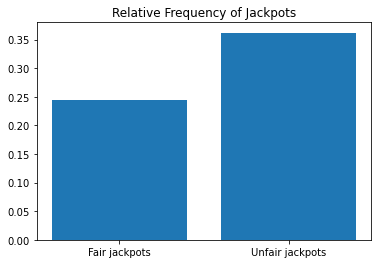

In [11]:
plot.bar(["Fair jackpots","Unfair jackpots"],[(fj/1000), (uj/1000)])
plot.title("Relative Frequency of Jackpots");

## Senario 2: 6 sided die

For this senario we create 3 standard 6-sided dice, 'fair' is weighted fairly, 'unfair1' is weighted towards 6 by a factor of 5, and 'unfair2' is weighted towards 1 by a factor of 5. The weights of each die are displayed below:

In [12]:
fair = die([1,2,3,4,5,6])
unfair1 = die([1,2,3,4,5,6])
unfair1.change_weight(6, 5)
unfair2 = die([1,2,3,4,5,6])
unfair2.change_weight(1,5)
print("Fair: \n", fair.display())
print("\n Unfair1: \n ", unfair1.display())
print("\n Unfair2: \n ", unfair2.display())

Fair: 
        Weight
Faces        
1         1.0
2         1.0
3         1.0
4         1.0
5         1.0
6         1.0

 Unfair1: 
         Weight
Faces        
1         1.0
2         1.0
3         1.0
4         1.0
5         1.0
6         5.0

 Unfair2: 
         Weight
Faces        
1         5.0
2         1.0
3         1.0
4         1.0
5         1.0
6         1.0


Next we use these dice to play two games: a fair game with 6 fair dice, and an unfair game with two unfair1s, one unfair2, and two fair dice. We both sets of dice 10000 times:

In [13]:
fairgame=game([fair, fair, fair, fair, fair])
fairgame.play(10000)
print("Fair game: \n", fairgame.show_rolls(wide = True))

Fair game: 
        Die 1  Die 2  Die 3  Die 4  Die 5
1          6      3      4      3      2
2          4      1      3      5      1
3          2      3      1      2      2
4          2      5      2      5      1
5          4      3      3      3      4
...      ...    ...    ...    ...    ...
9996       4      4      4      2      3
9997       3      1      5      6      3
9998       4      6      6      5      2
9999       3      6      6      3      1
10000      5      1      6      1      6

[10000 rows x 5 columns]


In [14]:
unfairgame=game([unfair1, unfair1, unfair2, fair, fair])
unfairgame.play(10000)
print("Unfair game: \n", unfairgame.show_rolls())

Unfair game: 
        Die 1  Die 2  Die 3  Die 4  Die 5
1          6      5      4      2      1
2          3      6      1      6      1
3          1      2      5      1      1
4          6      4      5      5      2
5          6      1      1      2      6
...      ...    ...    ...    ...    ...
9996       5      6      6      1      5
9997       6      6      3      5      4
9998       4      4      1      6      6
9999       5      6      1      4      4
10000      2      6      1      1      1

[10000 rows x 5 columns]


We again analyze the relative frequency of jackpots of the two games:

In [15]:
fairanalyzer = analyzer(fairgame)
unfairanalyzer = analyzer(unfairgame)

In [16]:
fj = fairanalyzer.jackpot()
print("Relative frequency of fair game jackpots:", fj/10000)

Relative frequency of fair game jackpots: 0.0007


In [17]:
uj = unfairanalyzer.jackpot()
print("Relative frequency of unfair game jackpots:", uj/10000)

Relative frequency of unfair game jackpots: 0.0015


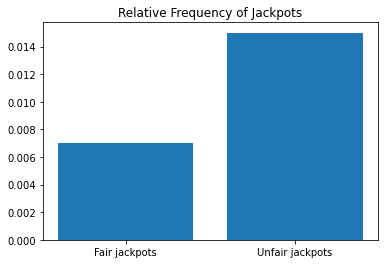

In [18]:
plot.bar(["Fair jackpots","Unfair jackpots"],[(fj/1000), (uj/1000)])
plot.title("Relative Frequency of Jackpots");

**We can use the combo and sequence functions to produce multi-index representations of the frequency of each roll combination or roll sequence:

In [19]:
print("Fair game: \n", fairanalyzer.combo(), fairanalyzer.sequence())
print("Unfair game: \n", unfairanalyzer.combo(), unfairanalyzer.sequence())

Fair game: 
            Frequency
0 1 2 3 4           
2 3 4 5 6        171
1 2 4 5 6        165
    3 5 6        164
      4 5        163
        6        149
...              ...
2 2 2 2 4          2
1 1 1 1 2          2
3 3 3 3 3          1
2 2 2 2 2          1
1 1 1 1 1          1

[250 rows x 1 columns]                                Frequency
Die 1 Die 2 Die 3 Die 4 Die 5           
5     2     2     1     4              7
4     4     4     2     3              7
5     3     5     2     1              7
6     3     5     3     5              6
5     4     2     2     6              6
...                                  ...
4     1     6     6     5              1
1     4     3     6     6              1
4     2     1     1     2              1
                        3              1
1     1     1     1     1              1

[5631 rows x 1 columns]
Unfair game: 
            Frequency
0 1 2 3 4           
1 3 4 6 6        229
  2 3 6 6        210
    4 6 6        203
  4 5 6 6   